# Importing Libraries and Dataset

In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import StandardScaler

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [3]:
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
# importing datasets
df = pd.read_excel('/content/Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Analysis

In [5]:
# checking for the records by country
df.Country.value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [6]:
# based on above observations, taking out the Germany values
df = df[df['Country'] == 'Germany']

In [7]:
# understanding dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9495 entries, 1109 to 541805
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    9495 non-null   object        
 1   StockCode    9495 non-null   object        
 2   Description  9495 non-null   object        
 3   Quantity     9495 non-null   int64         
 4   InvoiceDate  9495 non-null   datetime64[ns]
 5   UnitPrice    9495 non-null   float64       
 6   CustomerID   9495 non-null   float64       
 7   Country      9495 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 667.6+ KB


In [8]:
# checking for null values
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
# looking for stats
df.describe()

,Quantity,UnitPrice,CustomerID
count,9495.000000,9495.000000,9495.000000
mean,12.369458,3.966930,12646.139336
std,17.865719,16.549026,309.138487
min,-288.000000,0.000000,12426.000000
25%,5.000000,1.250000,12480.000000
50%,10.000000,1.950000,12592.000000
75%,12.000000,3.750000,12662.000000
max,600.000000,599.500000,14335.000000


In [10]:
# checking the samples for any discripency
df.InvoiceNo.sample(10)

233219    557466
309337    564079
377740    569563
117111    546365
48054     540458
409255    572054
523394    580511
59060     541269
400462    571312
6965      536983
Name: InvoiceNo, dtype: object

In [12]:
# heccking the records for negative values
print('shape of data containg quantity less than 0:', df[df.Quantity <=0].shape)
print('shape of data containg unitprice is negative:', df[df.UnitPrice <=0].shape)

shape of data containg quantity less than 0: (453, 8)
shape of data containg unitprice is negative: (2, 8)


In [13]:
# removing the above observations from the dataset
df = df[(df.Quantity > 0) & (df.UnitPrice > 0)]
df.shape

(9040, 8)

# Market Business Analysis

In [14]:
# filtering the dataset
df_mba = df[['InvoiceNo', 'Description', 'Quantity']]
df_mba.head(2)

,InvoiceNo,Description,Quantity
1109,536527,SET OF 6 T-LIGHTS SANTA,6
1110,536527,ROTATING SILVER ANGELS T-LIGHT HLDR,6


In [15]:
# Total unique items present in final dataset
len(df_mba.Description.unique())

1696

In [16]:
# Total unique InvoiceNo present in final dataset
len(df_mba.InvoiceNo.unique())

457

In [17]:
# printing the top 20 selling items

top_20 = pd.DataFrame(df_mba.Description.value_counts().head(20))
top_20.reset_index(inplace=True)
top_20.columns = ['Description', 'Count']

In [18]:
top_20.head(3)

,Description,Count
0,POSTAGE,374
1,ROUND SNACK BOXES SET OF4 WOODLAND,113
2,ROUND SNACK BOXES SET OF 4 FRUITS,72


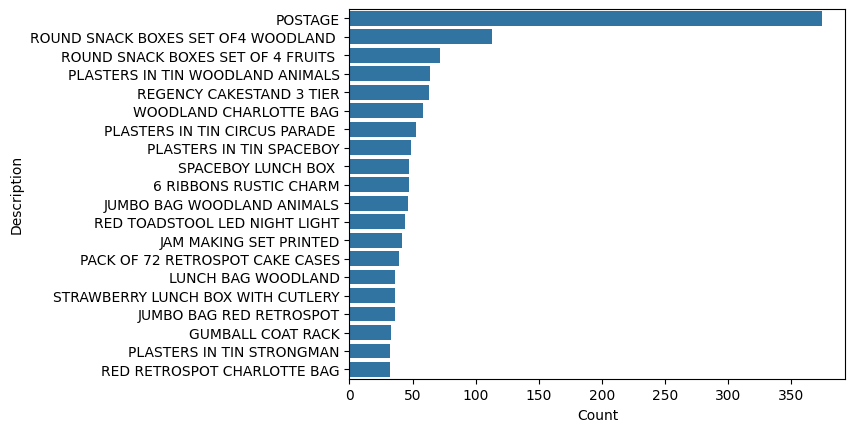

In [19]:
# plotting the count of each item
sns.barplot(top_20, y="Description", x="Count", orient = 'h');

In [20]:
# Grouping the Invoices based on the description of the items
df_mba = df_mba.groupby('InvoiceNo')['Description'].agg(lambda x: ', '.join(x)).reset_index()
df_mba.head(2)

,InvoiceNo,Description
0,536527,"SET OF 6 T-LIGHTS SANTA, ROTATING SILVER ANGEL..."
1,536840,"JAM MAKING SET PRINTED, JAM JAR WITH PINK LID,..."


In [21]:
# shape of the final dataset
df_mba.shape

(457, 2)

In [22]:
# Splitting the Description column
df_items = df_mba['Description'].str.split(', ', expand=True)

# one hot encoding
df_ohe = pd.get_dummies(df_items.apply(lambda x: x.str.strip()), prefix='', prefix_sep='').groupby(level=0, axis=1).max()

# final dataset
df_final = pd.concat([df_mba, df_ohe], axis=1)

In [23]:
# dropping the Description column
df_final.drop('Description', axis =1, inplace =True)

# setting invoice no as index
df_final.set_index('InvoiceNo', inplace =True)

In [24]:
df_final.head(2)

,,"1 HANGER ,MAGIC GARDEN",10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Apriori Model

- min_support : float (default: 0.5)

A float between 0 and 1 for minumum support of the itemsets returned. The support is computed as the fraction transactions_where_item(s)_occur / total_transactions.

- use_colnames : bool (default: False)

If True, uses the DataFrames' column names in the returned DataFrame instead of column indices.

- max_len : int (default: None)

Maximum length of the itemsets generated. If None (default) all possible itemsets lengths (under the apriori condition) are evaluated.

- verbose : int (default: 0)

Shows the number of iterations if >= 1 and low_memory is True. If

=1 and low_memory is False, shows the number of combinations.

- low_memory : bool (default: False)

If True, uses an iterator to search for combinations above min_support. Note that while low_memory=True should only be used for large dataset if memory resources are limited, because this implementation is approx. 3-6x slower than the default.

#### Try 1

In [25]:
# instanciating the apriori model with default parameters

df_support = apriori(df_final)

In [26]:
# sorting the result based on the support, maximum on top
df_support = df_support.sort_values("support", ascending = False)

In [27]:
# creating a column indicating number of items in each bucket
df_support['total Items'] = df_support['itemsets'].apply(lambda x: len(x))

In [28]:
print(df_support.shape)
df_support.head(10)

(1, 3)


,support,itemsets,total Items
0,0.818381,(1081),1


By Using default parameters, we are not getting any output from the data.
So, trying with different random parameters.

#### Try 2

In [29]:
# instanciating the apriori model

df_support1 = apriori(df_final, min_support = 0.1, use_colnames = True, verbose = 1)


Processing 57 combinations | Sampling itemset size 3


In [30]:
# sorting the result based on the support, maximum on top
df_support1 = df_support1.sort_values("support", ascending = False)

In [31]:
# creating a column indicating number of items in each bucket
df_support1['total Items'] = df_support1['itemsets'].apply(lambda x: len(x))

In [32]:
print(df_support1.shape)
df_support1.head(10)

(20, 3)


,support,itemsets,total Items
5,0.818381,(POSTAGE),1
8,0.245077,(ROUND SNACK BOXES SET OF4 WOODLAND),1
16,0.225383,"(POSTAGE, ROUND SNACK BOXES SET OF4 WOODLAND)",2
7,0.157549,(ROUND SNACK BOXES SET OF 4 FRUITS),1
15,0.150985,"(POSTAGE, ROUND SNACK BOXES SET OF 4 FRUITS)",2
4,0.137856,(PLASTERS IN TIN WOODLAND ANIMALS),1
6,0.137856,(REGENCY CAKESTAND 3 TIER),1
18,0.131291,"(ROUND SNACK BOXES SET OF4 WOODLAND, ROUND SNA...",2
10,0.126915,(WOODLAND CHARLOTTE BAG),1
19,0.124726,"(POSTAGE, ROUND SNACK BOXES SET OF4 WOODLAND, ...",3


In [33]:
# printing out the association dataset, based on the confidence metric
df_ass_rule1 = association_rules(df_support1, metric="confidence", min_threshold=0.2)

# sorting the values based on confidence
df_ass_rule1 = df_ass_rule1.sort_values('confidence',ascending=False)

In [34]:
print(df_ass_rule1.shape)
df_ass_rule1.head(10)

(15, 10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(ROUND SNACK BOXES SET OF 4 FRUITS),(POSTAGE),0.157549,0.818381,0.150985,0.958333,1.171012,0.022049,4.358862,0.173348
7,"(ROUND SNACK BOXES SET OF4 WOODLAND, ROUND SNA...",(POSTAGE),0.131291,0.818381,0.124726,0.950000,1.160829,0.017280,3.632385,0.159486
14,(PLASTERS IN TIN SPACEBOY),(POSTAGE),0.107221,0.818381,0.100656,0.938776,1.147113,0.012909,2.966448,0.143649
1,(ROUND SNACK BOXES SET OF4 WOODLAND),(POSTAGE),0.245077,0.818381,0.225383,0.919643,1.123735,0.024817,2.260151,0.145856
12,(WOODLAND CHARLOTTE BAG),(POSTAGE),0.126915,0.818381,0.115974,0.913793,1.116587,0.012109,2.106783,0.119591
10,(REGENCY CAKESTAND 3 TIER),(POSTAGE),0.137856,0.818381,0.120350,0.873016,1.066760,0.007532,1.430252,0.072589
13,(PLASTERS IN TIN CIRCUS PARADE),(POSTAGE),0.115974,0.818381,0.100656,0.867925,1.060539,0.005746,1.375117,0.064572
11,(PLASTERS IN TIN WOODLAND ANIMALS),(POSTAGE),0.137856,0.818381,0.118162,0.857143,1.047364,0.005344,1.271335,0.052453
4,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.157549,0.245077,0.131291,0.833333,3.400298,0.092679,4.529540,0.837922
6,"(POSTAGE, ROUND SNACK BOXES SET OF 4 FRUITS)",(ROUND SNACK BOXES SET OF4 WOODLAND),0.150985,0.245077,0.124726,0.826087,3.370730,0.087724,4.340810,0.828405


In [35]:
top = df_ass_rule1.head(8)

top = [list(x) for x in top['antecedents'].tolist()]
top = [i[0] for i in top ]
top

['ROUND SNACK BOXES SET OF 4 FRUITS',
 'ROUND SNACK BOXES SET OF4 WOODLAND',
 'PLASTERS IN TIN SPACEBOY',
 'ROUND SNACK BOXES SET OF4 WOODLAND',
 'WOODLAND CHARLOTTE BAG',
 'REGENCY CAKESTAND 3 TIER',
 'PLASTERS IN TIN CIRCUS PARADE',
 'PLASTERS IN TIN WOODLAND ANIMALS']

**Observations**

Based on the above observation and Confidence values, we can say that following items are highly associated with the `Postage`.

['ROUND SNACK BOXES SET OF 4 FRUITS',
 'ROUND SNACK BOXES SET OF 4 FRUITS',
 'PLASTERS IN TIN SPACEBOY',
 'ROUND SNACK BOXES SET OF4 WOODLAND',
 'WOODLAND CHARLOTTE BAG',
 'REGENCY CAKESTAND 3 TIER',
 'PLASTERS IN TIN CIRCUS PARADE',
 'PLASTERS IN TIN WOODLAND ANIMALS']

- Antecedents:

The items or features that appear before the arrow in the association rule (A -> B). These are the conditions or items present in the dataset.

- Consequents:

The items or features that appear after the arrow in the association rule (A -> B). These are the outcomes or items that are predicted or inferred based on the antecedents.

- Antecedent Support:

The proportion of transactions in the dataset that contain the antecedent itemset. It gives an indication of how frequently the antecedent occurs.

- Consequent Support:

The proportion of transactions in the dataset that contain the consequent itemset. It gives an indication of how frequently the consequent occurs.

- Support:

The proportion of transactions in the dataset that contain both the antecedent and consequent itemsets. It is a measure of how frequently the rule is observed.

- Confidence:

The likelihood that the rule is true. It is calculated as the support of the itemset {A, B} divided by the support of A. For the rule A -> B, confidence indicates the probability of B occurring given that A has occurred.

- Lift:

Indicates the degree to which the occurrence of B is dependent on the occurrence of A, compared to their individual occurrences. A lift greater than 1 suggests a positive correlation, while a lift less than 1 suggests a negative correlation.

- Leverage:

Measures the difference between the observed support of the itemset {A, B} and the expected support if A and B were independent. Positive values indicate that the occurrence of A and B together is more frequent than expected.

- Conviction:

Measures the ratio of the expected frequency that A occurs without B to the observed frequency that A occurs without B. Higher conviction values indicate stronger dependency between A and B.

- Zhang's Metric:

An alternative metric for measuring the interestingness of association rules. It considers both confidence and support and is used to rank rules.
Interpreting the output involves analyzing these metrics to identify meaningful and actionable rules. For example, high confidence and lift values indicate strong associations, while low confidence might suggest weak or spurious relationships.

#RFM Model

In [36]:
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1109,536527,22809,SET OF 6 T-LIGHTS SANTA,6,2010-12-01 13:04:00,2.95,12662.0,Germany


In [37]:
# converting customerId into integer format

df['CustomerID'] = df['CustomerID'].astype(int)

In [38]:
# calculating the total spending

df['Total_cost'] = df['Quantity'] * df['UnitPrice']

In [39]:
# filtering the dataset

df_rfm = df[['InvoiceNo',	'InvoiceDate', 'CustomerID', 'Total_cost']]
df_rfm.head(2)

,InvoiceNo,InvoiceDate,CustomerID,Total_cost
1109,536527,2010-12-01 13:04:00,12662,17.7
1110,536527,2010-12-01 13:04:00,12662,15.3


In [40]:
# calculating the amount of money spent by each customer

df_money = df_rfm.groupby('CustomerID')['Total_cost'].sum()
df_money = df_money.reset_index()
df_money.head()

,CustomerID,Total_cost
0,12426,582.73
1,12427,825.80
2,12468,729.54
3,12471,19824.05
4,12472,6572.11


In [41]:
# calculating how frequently

df_freq = df_rfm.groupby(['CustomerID','InvoiceDate'])['InvoiceNo'].count()

df_freq = df_freq.reset_index()

df_freq = df_freq[['CustomerID', 'InvoiceNo']]

df_freq = df_freq.groupby('CustomerID')['InvoiceNo'].count()

df_freq = df_freq.reset_index()

df_freq.head()

,CustomerID,InvoiceNo
0,12426,1
1,12427,3
2,12468,2
3,12471,30
4,12472,7


In [42]:
# identifying the minimum and maximum date present in dataset

df_rfm.InvoiceDate.min(), df_rfm.InvoiceDate.max()

(Timestamp('2010-12-01 13:04:00'), Timestamp('2011-12-09 12:16:00'))

In [43]:
# Calculating the date diff, which indicates how recently customer has purchased the items

df_rfm['time_diff'] = df_rfm.InvoiceDate.max() - df_rfm['InvoiceDate']

In [44]:
# Extracting the days in time_diff column

df_rfm['time_diff'] = df_rfm['time_diff'].dt.days

df_rfm.head(2)

,InvoiceNo,InvoiceDate,CustomerID,Total_cost,time_diff
1109,536527,2010-12-01 13:04:00,12662,17.7,372
1110,536527,2010-12-01 13:04:00,12662,15.3,372


In [45]:
# Aggregating the customerID with respect to date diff column

df_recency = df_rfm.groupby('CustomerID')['time_diff'].min()
df_recency = df_recency.reset_index()
df_recency.head()

,CustomerID,time_diff
0,12426,193
1,12427,21
2,12468,187
3,12471,1
4,12472,31


In [46]:
# Creating the dataset with all 3 determined quantities

df_cluster = pd.merge(df_recency, df_freq, on = 'CustomerID', how = 'inner').merge(df_money, on = 'CustomerID', how = 'inner')
df_cluster.head()

,CustomerID,time_diff,InvoiceNo,Total_cost
0,12426,193,1,582.73
1,12427,21,3,825.80
2,12468,187,2,729.54
3,12471,1,30,19824.05
4,12472,31,7,6572.11


In [47]:
df_cluster.describe()

,CustomerID,time_diff,InvoiceNo,Total_cost
count,94.000000,94.000000,94.000000,94.000000
mean,12706.829787,76.595745,4.840426,2434.756809
std,392.019712,91.419077,5.813043,3268.239206
min,12426.000000,0.000000,1.000000,63.000000
25%,12520.250000,15.250000,1.000000,530.150000
50%,12606.000000,30.000000,3.000000,1066.140000
75%,12664.250000,91.000000,5.000000,3328.692500
max,14335.000000,371.000000,30.000000,19824.050000


<Axes: xlabel='time_diff'>

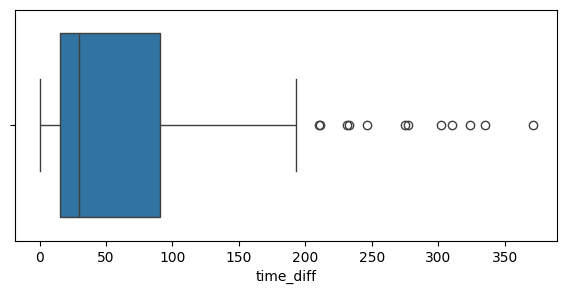

In [48]:
# Checking the outliers

plt.figure(figsize = (7,3))
sns.boxplot(x=df_cluster['time_diff'])

<Axes: xlabel='time_diff'>

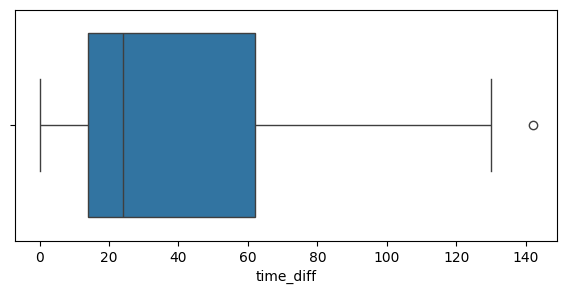

In [49]:
# removing the outliers from time_diff column

Q1 = df_cluster['time_diff'].quantile(0.05)
Q3 = df_cluster['time_diff'].quantile(0.60)
IQR = Q3 - Q1
df_cluster = df_cluster[(df_cluster['time_diff'] >= Q1 - 1.5*IQR) & (df_cluster['time_diff'] <= Q3 + 1.5*IQR)]

plt.figure(figsize = (7,3))
sns.boxplot(x=df_cluster['time_diff'])

<Axes: xlabel='InvoiceNo'>

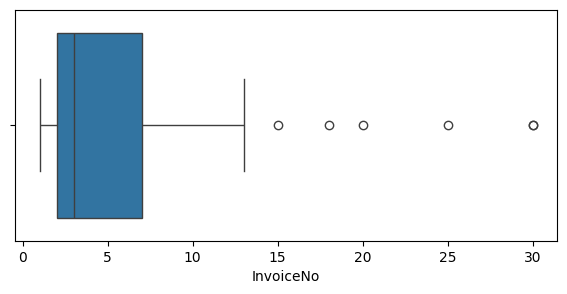

In [50]:
# checking for the outliers present in InvoiceNo column

plt.figure(figsize = (7,3))
sns.boxplot(x=df_cluster['InvoiceNo'])

<Axes: xlabel='InvoiceNo'>

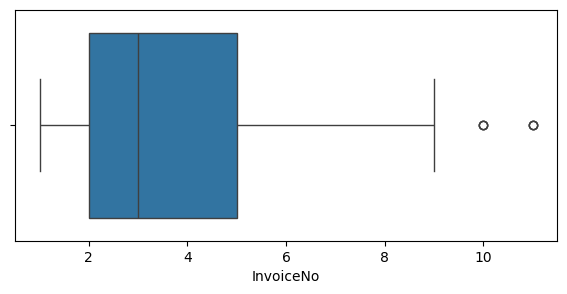

In [51]:
# Removing the outliers present in InvoiceNo column

Q1 = df_cluster['InvoiceNo'].quantile(0.05)
Q3 = df_cluster['InvoiceNo'].quantile(0.7)
IQR = Q3 - Q1
df_cluster = df_cluster[(df_cluster['InvoiceNo'] >= Q1 - 1.5*IQR) & (df_cluster['InvoiceNo'] <= Q3 + 1.5*IQR)]

plt.figure(figsize = (7,3))
sns.boxplot(x=df_cluster['InvoiceNo'])

<Axes: xlabel='Total_cost'>

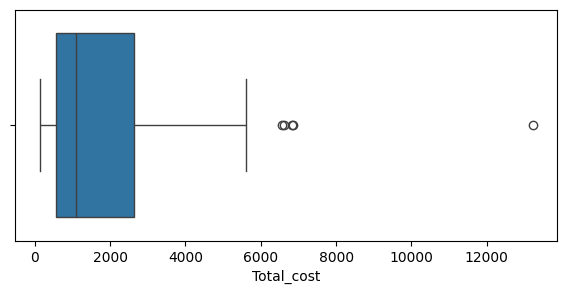

In [52]:
# checking the outliers present in Total_cost column

plt.figure(figsize = (7,3))
sns.boxplot(x=df_cluster['Total_cost'])

<Axes: xlabel='Total_cost'>

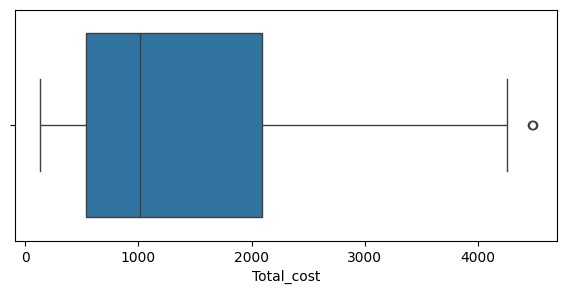

In [53]:
# removing the outliers from Total_cost column

Q1 = df_cluster['Total_cost'].quantile(0.05)
Q3 = df_cluster['Total_cost'].quantile(0.7)
IQR = Q3 - Q1
df_cluster = df_cluster[(df_cluster['Total_cost'] >= Q1 - 1.5*IQR) & (df_cluster['Total_cost'] <= Q3 + 1.5*IQR)]

plt.figure(figsize = (7,3))
sns.boxplot(x=df_cluster['Total_cost'])

In [54]:
# scaling

In [55]:
# Standardizing the dataset for further analysis
sc = StandardScaler()
df_cluster_sc = sc.fit_transform(df_cluster[['time_diff'	,'InvoiceNo'	,'Total_cost']])

# converting into dataset
df_cluster_sc = pd.DataFrame(df_cluster_sc)
df_cluster_sc.columns = ['time_diff'	,'InvoiceNo'	,'Total_cost']
df_cluster_sc.head()

,time_diff,InvoiceNo,Total_cost
0,-0.614161,-0.142656,-0.513487
1,-0.425682,0.638853,1.973943
2,0.247459,-0.924165,-0.595332
3,-0.910343,-0.924165,-0.752101
4,-0.452607,0.248098,1.448991


## Kmeans clustering

In [56]:
# importing dataset

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

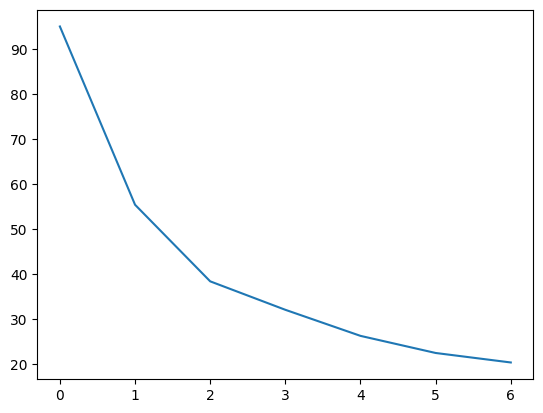

In [57]:
# elbow-curve/SSD
# calculating the sum of squared distance for optimum cluster values

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_cluster_sc)

    ssd.append(kmeans.inertia_)

# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd);

In [58]:
ssd

[95.01496771927725,
 55.39379284304215,
 38.365877159565514,
 32.04073865495787,
 26.24722878081069,
 22.443638690482008,
 20.333374351617373]

In [59]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_cluster_sc)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(df_cluster_sc, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))


For n_clusters=2, the silhouette score is 0.47759918856319034
For n_clusters=3, the silhouette score is 0.44025132883420315
For n_clusters=4, the silhouette score is 0.4549261068842031
For n_clusters=5, the silhouette score is 0.4199612162648319
For n_clusters=6, the silhouette score is 0.40705714755205086
For n_clusters=7, the silhouette score is 0.4156015621109813
For n_clusters=8, the silhouette score is 0.3546842192514195


In [60]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(df_cluster_sc)

KMeans(max_iter=50, n_clusters=3)

In [61]:
# assign the label
df_cluster['cluster_id'] = kmeans.labels_
df_cluster.head()

,CustomerID,time_diff,InvoiceNo,Total_cost,cluster_id
1,12427,21,3,825.80,0
5,12473,28,5,3938.55,1
7,12475,53,1,723.38,0
10,12479,10,1,527.20,0
11,12480,27,4,3281.63,1


<Axes: xlabel='cluster_id', ylabel='Total_cost'>

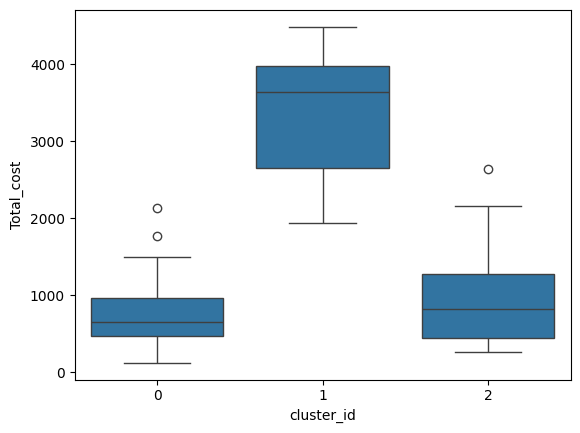

In [62]:
# plot
sns.boxplot(x='cluster_id', y='Total_cost', data=df_cluster,)

<Axes: xlabel='cluster_id', ylabel='InvoiceNo'>

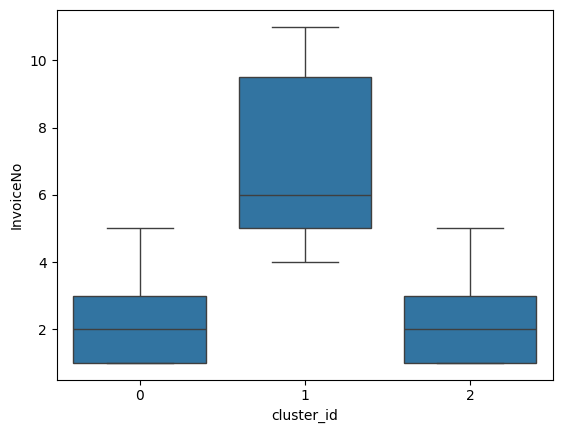

In [63]:
# plot
sns.boxplot(x='cluster_id', y='InvoiceNo', data=df_cluster)

<Axes: xlabel='cluster_id', ylabel='time_diff'>

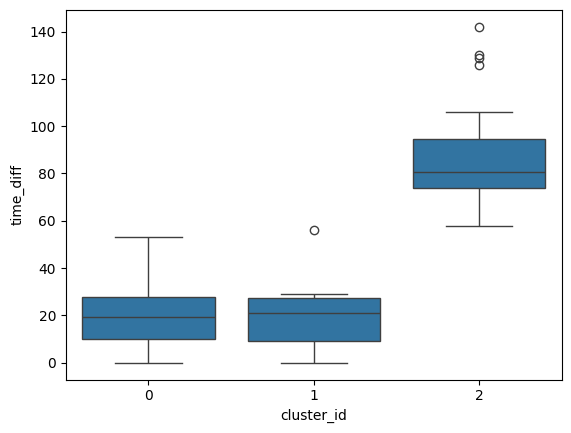

In [64]:

# plot
sns.boxplot(x='cluster_id', y='time_diff', data=df_cluster)